<a href="https://colab.research.google.com/github/jrahemtulla/PS4HouseData/blob/main/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [ ]:
url = "https://raw.githubusercontent.com/jrahemtulla/PS4HouseData/main/train.csv"
data = pd.read_csv(url)
train = data.shape
train = data.iloc[0:20,:]

train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [ ]:
# investigate Sale Price
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <a list of 10 Patch objects>)

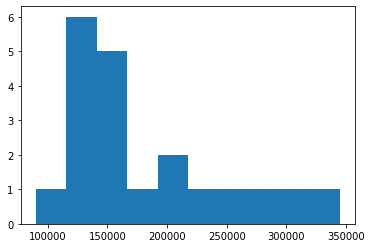

In [ ]:
# plot hist
plt.hist(train['SalePrice'])

In [ ]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(20, 38)

In [ ]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index
cols

Index(['SalePrice', 'OverallQual', 'MasVnrArea', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'GarageArea', 'BedroomAbvGr', 'GrLivArea'],
      dtype='object')

In [ ]:
# pick out X cols and Y = SalePrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,MasVnrArea,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,BedroomAbvGr,GrLivArea
0,7,196.0,2,8,2003,2003,548,3,1710
1,6,0.0,2,6,1976,1976,460,3,1262
2,7,162.0,2,6,2001,2002,608,3,1786
3,7,0.0,1,7,1915,1970,642,3,1717
4,8,350.0,2,9,2000,2000,836,4,2198
5,5,0.0,1,5,1993,1995,480,1,1362
6,8,186.0,2,7,2004,2005,636,3,1694
7,7,240.0,2,7,1973,1973,484,3,2090
8,7,0.0,2,8,1931,1950,468,2,1774
9,5,0.0,1,5,1939,1950,205,2,1077


In [ ]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [ ]:
# How good is the model
model.score(X,Y)


0.9235332883955819

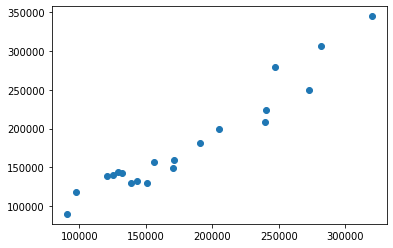

In [ ]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [ ]:
print (lr.coef_)

[ 3.92010055e+04 -3.49461725e+00  1.01633147e+04 -2.29668644e+03
  1.37054941e+03 -4.23237537e+02 -5.86146501e+00  1.22127004e+04
 -2.26600331e+01]


In [ ]:
print (lr.intercept_)

-1927974.120641991


**Testing the model**

In [ ]:

#import test data
url_test = "https://raw.githubusercontent.com/jrahemtulla/PS4HouseData/main/test.csv"
test = pd.read_csv(url_test)
test.fillna(test.mean(),inplace=True)
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.000000,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.000000,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.000000,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,70.259358,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.000000,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [ ]:
numeric_test = test.select_dtypes(include=[np.number])
numeric_test.shape

(460, 37)

In [ ]:
#test the model on the test data 
variables = cols.drop('SalePrice')
variables

Index(['OverallQual', 'MasVnrArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageArea', 'BedroomAbvGr', 'GrLivArea'],
      dtype='object')

In [ ]:
X_test = test[variables]
X_test


,OverallQual,MasVnrArea,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,BedroomAbvGr,GrLivArea
0,3,0.0,1,4,1952,1952,528,2,944
1,5,0.0,1,4,1920,1950,216,2,691
2,8,53.0,2,7,2006,2006,824,3,1574
3,5,164.0,2,8,1976,1976,528,4,1680
4,7,16.0,2,7,2005,2006,457,1,1504
...,...,...,...,...,...,...,...,...,...
455,6,0.0,2,7,1999,2000,460,3,1647
456,6,119.0,2,7,1978,1988,500,3,2073
457,7,0.0,2,9,1941,2006,252,4,2340
458,5,0.0,1,5,1950,1996,240,2,1078


In [ ]:
predictions = model.predict(X_test)
predictions

array([ 39697.7148036 ,  82650.38534581, 286147.51019737, 148986.27902997,
       225017.21518081, 159039.5807981 , 173939.60179206, 101634.45123227,
       242960.71633119, 101007.92697578, 135018.90520302, 142596.37972289,
        93650.47941155,  37367.98445821, 148209.44863224, 283565.7826181 ,
       242884.61131885, 244160.57399311, 237018.07445523, 239553.3588093 ,
       123000.80969284, 246069.21052649,  79469.11014607, 237354.13415507,
       209740.69807764, 148759.61753806, 125306.79999473, 284184.77139131,
       103388.45264184, 175926.20023416,  64379.41139683, 124162.60295339,
       270280.74182384, 242349.97223962,  98923.32439392,  97189.66565936,
       314338.9971363 , 263701.51809399,  81517.47546932,  94568.04497244,
        98385.13719256, 157495.52106746, 193924.78250091, 221660.13257737,
       250395.15733992,  50508.32544828, 307936.52539861, 165493.18848649,
        89062.02000239,  44833.98678439, 258813.49511177, 258472.80878794,
       151256.42937353, 1

In [ ]:
results = pd.DataFrame(predictions, test.Id)
results.columns = ["SalePrice"]
results

,SalePrice
Id,
1001,39697.714804
1002,82650.385346
1003,286147.510197
1004,148986.279030
1005,225017.215181
...,...
1456,201355.684029
1457,167349.504722
1458,151660.507965


In [ ]:
results.to_csv('results.csv')